In [1]:
import numpy as np
import pandas as pd
import random
import os
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import gaussian_kde
import warnings
import keras
from keras.models import Sequential
from keras import layers
from keras import activations
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
X = pd.read_csv('../Project1/VoD_periodic/X.csv')
Y = pd.read_csv('../Project1/VoD_periodic/Y.csv')
print("The shape of X.csv is:")
print(X.shape)
print("The shape of Y.csv is:")
print(Y.shape)

The shape of X.csv is:
(37036, 1714)
The shape of Y.csv is:
(37036, 10)


In [3]:
X

,TimeStamp,0_all_..usr,0_all_..sys,0_all_..iowait,0_all_..soft,0_all_..idle,0_cpu0_.usr,0_cpu0_.sys,0_cpu0_.iowait,0_cpu0_.soft,...,36_RxBytes.1,36_TxBytes.1,40_RxPacktes.1,40_TxPacktes.1,40_RxBytes.1,40_TxBytes.1,41_RxPacktes.1,41_TxPacktes.1,41_RxBytes.1,41_TxBytes.1
0,2016-11-17 19:08:42,0.04,0.13,0.13,0.00,99.71,1.0,0.00,1.00,0.0,...,104466,924,59,13,89326,858,13,59,858,155934
1,2016-11-17 19:08:43,0.08,0.17,0.00,0.00,99.75,0.0,0.00,0.00,0.0,...,47828,2256,29,9,43906,594,10,29,654,74314
2,2016-11-17 19:08:44,0.08,0.21,0.04,0.00,99.67,0.0,0.00,1.01,0.0,...,42392,660,28,11,42392,726,11,28,726,71352
3,2016-11-17 19:08:45,0.13,0.17,0.08,0.00,99.62,0.0,0.00,0.00,0.0,...,38248,973,68,28,94686,2029,30,68,2393,146814
4,2016-11-17 19:08:46,0.08,0.25,0.08,0.00,99.58,1.0,0.00,1.00,0.0,...,963602,5868,630,75,945081,5369,74,631,5308,1705350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37031,2016-11-18 07:09:46,0.08,0.21,0.00,0.04,99.67,0.0,0.00,1.00,0.0,...,673922,3756,69,20,103018,1452,20,69,1452,176866
37032,2016-11-18 07:09:47,0.17,0.21,0.00,0.00,99.63,0.0,0.00,0.00,0.0,...,566376,9678,63,13,93934,990,14,63,1050,167782
37033,2016-11-18 07:09:48,0.08,0.25,0.04,0.00,99.62,0.0,0.00,1.00,0.0,...,394270,10348,116,74,114740,8664,76,115,8900,187074
37034,2016-11-18 07:09:49,0.12,0.17,0.00,0.00,99.71,0.0,0.99,0.00,0.0,...,139420,1360,39,34,3930,7276,33,40,7100,3996


In [4]:
Y

,TimeStamp,noAudioPlayed,avgInterAudioPlayedDelay,NetReadOperations,NetReadBytes,NetReadAvgDelay,noAudioLost,noAudioLate,DispFrames,AvgInterDispDelay
0,2016-11-17 19:08:42,84,0.014553,2695,1880476,0.000606,0,0,23,0.070138
1,2016-11-17 19:08:43,42,0.024508,711,510624,0.001364,0,0,24,0.041706
2,2016-11-17 19:08:44,42,0.024569,281,162152,0.003416,0,0,24,0.041708
3,2016-11-17 19:08:45,48,0.021000,118,81056,0.007932,0,0,24,0.041708
4,2016-11-17 19:08:46,42,0.024002,69,48632,0.016347,0,0,24,0.041706
...,...,...,...,...,...,...,...,...,...,...
37031,2016-11-18 07:09:46,37,0.025945,230,113536,0.004696,0,0,24,0.041708
37032,2016-11-18 07:09:47,42,0.025147,211,113520,0.004665,0,0,24,0.041707
37033,2016-11-18 07:09:48,42,0.023425,156,97280,0.006463,0,0,24,0.041711
37034,2016-11-18 07:09:49,43,0.022346,182,89208,0.005535,0,0,24,0.041708


In [5]:
numpyX = X.drop(['TimeStamp'], axis=1).copy().to_numpy() #remove timestamp
numpyY = Y.drop(['TimeStamp'], axis=1).copy().to_numpy()

In [6]:
numpyX

array([[4.00000e-02, 1.30000e-01, 1.30000e-01, ..., 5.90000e+01,
        8.58000e+02, 1.55934e+05],
       [8.00000e-02, 1.70000e-01, 0.00000e+00, ..., 2.90000e+01,
        6.54000e+02, 7.43140e+04],
       [8.00000e-02, 2.10000e-01, 4.00000e-02, ..., 2.80000e+01,
        7.26000e+02, 7.13520e+04],
       ...,
       [8.00000e-02, 2.50000e-01, 4.00000e-02, ..., 1.15000e+02,
        8.90000e+03, 1.87074e+05],
       [1.20000e-01, 1.70000e-01, 0.00000e+00, ..., 4.00000e+01,
        7.10000e+03, 3.99600e+03],
       [1.30000e-01, 2.10000e-01, 4.00000e-02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [7]:
newX = np.zeros((37036,16))
for i in range(37036):
    newX[i] = numpyX[i][0:16]

In [8]:
newX

array([[4.0e-02, 1.3e-01, 1.3e-01, ..., 1.0e+02, 0.0e+00, 0.0e+00],
       [8.0e-02, 1.7e-01, 0.0e+00, ..., 1.0e+02, 0.0e+00, 0.0e+00],
       [8.0e-02, 2.1e-01, 4.0e-02, ..., 1.0e+02, 0.0e+00, 0.0e+00],
       ...,
       [8.0e-02, 2.5e-01, 4.0e-02, ..., 1.0e+02, 0.0e+00, 0.0e+00],
       [1.2e-01, 1.7e-01, 0.0e+00, ..., 1.0e+02, 0.0e+00, 0.0e+00],
       [1.3e-01, 2.1e-01, 4.0e-02, ..., 1.0e+02, 0.0e+00, 0.0e+00]])

In [9]:
newY = np.zeros((37036,1))
for i in range(37036):
    newY[i] = numpyY[i][7]

In [10]:
newY

array([[23.],
       [24.],
       [24.],
       ...,
       [24.],
       [24.],
       [24.]])

### Data pre-processing

In [11]:
# standardization in samples
def stdColumn(raw):
    stdColumnX = np.zeros(raw.T.shape)
    for i in range(raw.T.shape[0]):
        stdColumnX[i] = preprocessing.scale(raw.T[i])
    stdColumnX = stdColumnX.T
    return stdColumnX

In [12]:
newX = stdColumn(numpyX)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [13]:
#Verifycation of standardization
stdCorrect = 1
for i in newX.T:
    mean = float("{:.4f}".format(i.mean()))
    std = float("{:.4f}".format(i.std()))
    if mean != 0 or std != 1:
        stdCorrect = 0
if stdCorrect:
    print("Standardization in column is correct.")

Standardization in column is correct.


### Outlier removal

In [14]:
listDelete =[]
thresholdNew = 57.5
for i in range(newX.shape[0]):
    if abs(np.max(newX[i])) > thresholdNew or abs(np.min(newX[i])) > thresholdNew:
        listDelete.append(i)

In [15]:
len(listDelete) / newX.shape[0] #1% data with largest absolute values are treated as outliers and removed

0.010017280483853547

In [16]:
dataSetX = np.delete(newX, listDelete, 0)
dataSetY = np.delete(newY, listDelete, 0)

### Feature selection

In [17]:
def featureSelection(X, Y, numFeature):
    clf = RandomForestRegressor(n_estimators=10)
    clf.fit(X, Y)
    model = SelectFromModel(clf, prefit=True, max_features = numFeature, threshold=-np.inf)
    newX = model.transform(X)
    return newX

In [18]:
dataSetY = np.ravel(dataSetY)

In [33]:
dataSetX = featureSelection(dataSetX, dataSetY, 16)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Data preparation

In [34]:
def dataPrepare(step, l, h, X, Y):
    interval = step - 1
    trainsX, testsX, trainsY, testsY = train_test_split(X, Y, train_size = 0.7, shuffle = False)
    length = l * interval + l + 1 + h * interval + h
    numberTrain = trainsX.shape[0] - length + 1
    numberTest = testsX.shape[0] - length + 1
    trainX = np.zeros((numberTrain, 16*(l+1)))
    testX = np.zeros((numberTest, 16*(l+1)))
    trainY = np.zeros((numberTrain, 1*(h+1)))
    testY = np.zeros((numberTest, 1*(h+1)))
    trainX = assembleX(trainsX, trainX, interval, l)    
    testX = assembleX(testsX, testX, interval, l) 
    trainY = assembleY(trainsY, trainY, interval, h, l)    
    testY = assembleY(testsY, testY, interval, h, l)
    return(trainX, testX, trainY, testY)

In [35]:
def assembleX(arrays, newarrays, interval, numbers):
    for i in range(newarrays.shape[0]):
        newarray = arrays[i]
        for j in range(numbers):
            newarray = np.concatenate((newarray, arrays[i+(j+1)*interval+j+1]),axis=0)
        newarrays[i] = newarray
    return newarrays

In [36]:
def assembleY(arrays, newarrays, interval, numbers, l):
    for i in range(newarrays.shape[0]):
        newarray = arrays[i+l*interval+l]
        for j in range(numbers):
            newarray = np.concatenate((newarray, arrays[i+l*interval+l+(j+1)*interval+j+1]),axis=0)
        newarrays[i] = newarray
    return newarrays

In [37]:
newYs = np.zeros((dataSetY.shape[0], 1))

In [38]:
for i in range(dataSetY.shape[0]):
    newYs[i] = dataSetY[i]
dataSetY = newYs

In [39]:
trainX, testX, trainY, testY = dataPrepare(300, 2, 3, dataSetX, dataSetY)

In [40]:
testY

array([[24., 24., 24., 24.],
       [24., 24., 24., 24.],
       [24., 24., 24., 24.],
       ...,
       [24., 24., 24., 24.],
       [24., 24., 24., 24.],
       [24., 24., 24., 24.]])

### Linear forecasting

In [41]:
def calError(real, pred):
    return mean_absolute_error(pred, real)/real.mean()

In [42]:
tableNMAE = np.zeros((11,11))

In [43]:
for l in range(11):
    for h in range(11):
        trainX, testX, trainY, testY = dataPrepare(300, l, h, dataSetX, dataSetY)
        linearPred = LinearRegression()
        linearPred.fit(trainX, trainY)
        predY = linearPred.predict(testX)
        tableNMAE[l][h] = np.round(calError(testY, predY), 3)

In [44]:
tableNMAE

array([[0.104, 0.109, 0.118, 0.12 , 0.12 , 0.12 , 0.121, 0.124, 0.125,
        0.124, 0.122],
       [0.102, 0.106, 0.108, 0.11 , 0.113, 0.116, 0.118, 0.119, 0.119,
        0.117, 0.116],
       [0.106, 0.108, 0.11 , 0.113, 0.116, 0.118, 0.12 , 0.12 , 0.119,
        0.117, 0.116],
       [0.107, 0.11 , 0.113, 0.117, 0.119, 0.121, 0.121, 0.12 , 0.119,
        0.117, 0.116],
       [0.11 , 0.113, 0.117, 0.12 , 0.121, 0.121, 0.121, 0.12 , 0.119,
        0.118, 0.117],
       [0.113, 0.117, 0.12 , 0.121, 0.121, 0.121, 0.12 , 0.119, 0.119,
        0.119, 0.118],
       [0.118, 0.121, 0.121, 0.121, 0.119, 0.119, 0.119, 0.12 , 0.12 ,
        0.12 , 0.12 ],
       [0.12 , 0.12 , 0.118, 0.117, 0.116, 0.116, 0.118, 0.119, 0.12 ,
        0.12 , 0.12 ],
       [0.116, 0.114, 0.113, 0.113, 0.112, 0.114, 0.117, 0.119, 0.12 ,
        0.12 , 0.119],
       [0.11 , 0.109, 0.108, 0.109, 0.11 , 0.113, 0.116, 0.119, 0.12 ,
        0.12 , 0.118],
       [0.104, 0.105, 0.106, 0.108, 0.11 , 0.114, 0.118, 0.1

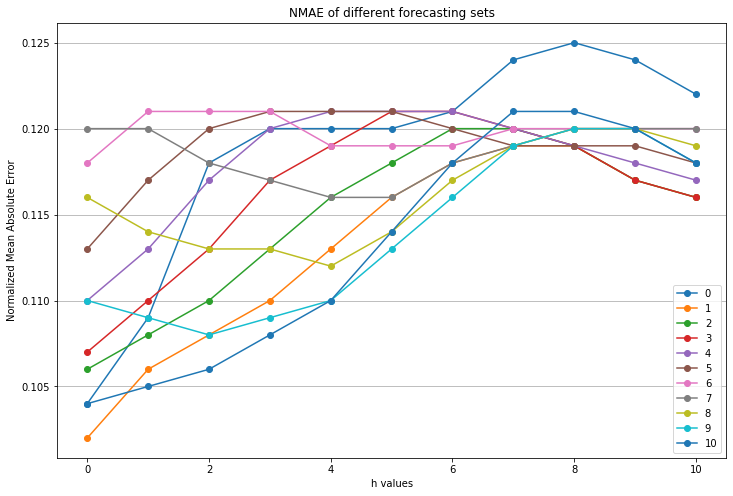

In [45]:
figure(figsize=(12, 8))
valuesH = np.arange(11)
for i in range(11):
    plt.plot(valuesH, tableNMAE[i], '-o', label = str(i))
plt.xlabel('h values')
plt.ylabel('Normalized Mean Absolute Error')
plt.legend()
plt.title('NMAE of different forecasting sets')
plt.grid()
plt.grid(axis='x')
plt.show()

### LSTM

In [97]:
trainX, testX, trainY, testY = dataPrepare(300, 2, 3, dataSetX, dataSetY)

In [98]:
#reshape to [samples, timesteps, features]
def reshape(arrays, sampleNum, featureNum):
    arrays = arrays.reshape((arrays.shape[0],sampleNum,featureNum))
    return arrays

In [99]:
trainX = reshape(trainX, 3, 16)
testX = reshape(testX, 3, 16)

In [89]:
sampleNum = 3
targetNum = 4
featureNum = 16

model = Sequential()

model.add(LSTM(units=64, activation = 'relu', dropout=0.5, return_sequences=True, input_shape=(sampleNum, featureNum)))

model.add(LSTM(units=32, activation = 'relu', dropout=0.3, return_sequences=True))

model.add(LSTM(units=32, activation = 'relu', dropout=0.3))

model.add(Dense(targetNum))

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model.compile(optimizer = 'adam', loss = 'mse')

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 3, 64)             20736     
_________________________________________________________________
lstm_17 (LSTM)               (None, 3, 32)             12416     
_________________________________________________________________
lstm_18 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 132       
Total params: 41,604
Trainable params: 41,604
Non-trainable params: 0
_________________________________________________________________
None


In [90]:
history = model.fit(trainX,trainY, epochs=100, verbose=1, batch_size=100, validation_split=0.2, callbacks=[callback])

Train on 19332 samples, validate on 4833 samples
Epoch 1/100
19332/19332 [==============================] - 20s 1ms/step - loss: 171.5506 - val_loss: 22.2132
Epoch 2/100
19332/19332 [==============================] - 7s 349us/step - loss: 19.8773 - val_loss: 15.1922
Epoch 3/100
19332/19332 [==============================] - 7s 350us/step - loss: 15.8737 - val_loss: 14.4488
Epoch 4/100
19332/19332 [==============================] - 7s 352us/step - loss: 15.0630 - val_loss: 14.6906
Epoch 5/100
19332/19332 [==============================] - 7s 350us/step - loss: 14.7610 - val_loss: 14.2345
Epoch 6/100
19332/19332 [==============================] - 6s 328us/step - loss: 14.4977 - val_loss: 14.1508
Epoch 7/100
19332/19332 [==============================] - 7s 357us/step - loss: 14.2402 - val_loss: 14.2068
Epoch 8/100
19332/19332 [==============================] - 7s 363us/step - loss: 14.1296 - val_loss: 14.1474
Epoch 9/100
19332/19332 [==============================] - 7s 357us/step - loss

In [91]:
results = model.evaluate(testX, testY)

9500/9500 [==============================] - 2s 204us/step


In [92]:
results

13.968163342168456

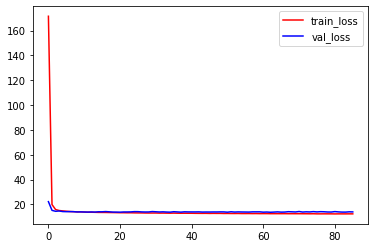

In [93]:
plt.plot(history.history['loss'],label='train_loss',color='r')
plt.plot(history.history['val_loss'],label='val_loss',color='b')
plt.legend()
plt.show()

In [118]:
def trainLSTM(sampleNum, targetNum, timeStep, dataSetX, dataSetY):
    
    trainX, testX, trainY, testY = dataPrepare(timeStep, sampleNum-1, targetNum-1, dataSetX, dataSetY)
    
    trainX = reshape(trainX, sampleNum, 16)
    testX = reshape(testX, sampleNum, 16)
    
    featureNum = 16

    model = Sequential()

    model.add(LSTM(units=128, activation = 'relu', dropout=0.5, return_sequences=True, input_shape=(sampleNum, featureNum)))

    model.add(LSTM(units=128, activation = 'relu', dropout=0.3))

    model.add(Dense(targetNum))

    callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    
    model.compile(optimizer = 'adam', loss = 'mae')
    
    history = model.fit(trainX,trainY, epochs=100, verbose=0, batch_size=100, validation_split=0.2, callbacks=[callback])
    
    predLSTMY = model.predict(testX, verbose=0)
    
    return(calError(testY, predLSTMY))

In [119]:
trainLSTM(3, 4, 300, dataSetX, dataSetY)

0.08470180621156606

In [130]:
nmaeLSTM = np.zeros((11,11))

In [ ]:
for l in range(11):
    for h in range(11):
        nmaeLSTM[l,h] = trainLSTM(l+1, h+1, 300, dataSetX, dataSetY)

In [135]:
nmaeLSTM

array([[0.07362773, 0.07463939, 0.07682629, 0.07843229, 0.08138694,
        0.08421393, 0.08576875, 0.08770391, 0.08822183, 0.08717539,
        0.08541389],
       [0.07430035, 0.07549519, 0.07865391, 0.08127212, 0.08614198,
        0.08711922, 0.09141001, 0.09010745, 0.09057105, 0.08834035,
        0.08561282],
       [0.08368124, 0.08538279, 0.08086037, 0.08410272, 0.08970976,
        0.09040107, 0.09178885, 0.0918867 , 0.09017941, 0.08907397,
        0.08722169],
       [0.08202625, 0.0829161 , 0.08622886, 0.08985114, 0.09157851,
        0.09363889, 0.09920749, 0.09265259, 0.09193294, 0.08930697,
        0.09017149],
       [0.09144633, 0.08389849, 0.08838828, 0.09486077, 0.09234208,
        0.09367938, 0.09600328, 0.09250287, 0.09177412, 0.09321167,
        0.09112682],
       [0.08486333, 0.08670587, 0.09794133, 0.09641394, 0.09164474,
        0.09362945, 0.09605639, 0.09198035, 0.09117584, 0.10129592,
        0.08851593],
       [0.08948404, 0.09089399, 0.09144361, 0.09504895, 0.

In [136]:
for i in range(11):
    for j in range(11):
        nmaeLSTM[i][j] = format(nmaeLSTM[i][j], '.3f')

In [137]:
nmaeLSTM

array([[0.074, 0.075, 0.077, 0.078, 0.081, 0.084, 0.086, 0.088, 0.088,
        0.087, 0.085],
       [0.074, 0.075, 0.079, 0.081, 0.086, 0.087, 0.091, 0.09 , 0.091,
        0.088, 0.086],
       [0.084, 0.085, 0.081, 0.084, 0.09 , 0.09 , 0.092, 0.092, 0.09 ,
        0.089, 0.087],
       [0.082, 0.083, 0.086, 0.09 , 0.092, 0.094, 0.099, 0.093, 0.092,
        0.089, 0.09 ],
       [0.091, 0.084, 0.088, 0.095, 0.092, 0.094, 0.096, 0.093, 0.092,
        0.093, 0.091],
       [0.085, 0.087, 0.098, 0.096, 0.092, 0.094, 0.096, 0.092, 0.091,
        0.101, 0.089],
       [0.089, 0.091, 0.091, 0.095, 0.099, 0.095, 0.092, 0.094, 0.091,
        0.09 , 0.09 ],
       [0.097, 0.104, 0.099, 0.092, 0.092, 0.094, 0.096, 0.091, 0.096,
        0.095, 0.089],
       [0.088, 0.098, 0.095, 0.095, 0.09 , 0.094, 0.094, 0.091, 0.092,
        0.09 , 0.088],
       [0.092, 0.082, 0.086, 0.09 , 0.085, 0.091, 0.096, 0.092, 0.091,
        0.091, 0.09 ],
       [0.081, 0.076, 0.085, 0.083, 0.083, 0.088, 0.089, 0.0

In [2]:
testXXX = [[0.0736 , 0.0743 , 0.0837 , 0.0820 , 0.0914 , 0.0849 , 0.0895 , 0.0974 , 0.0875 , 0.0920 , 0.0807 ],
[0.0746 , 0.0754 , 0.0854 , 0.0829 , 0.0839 , 0.0867 , 0.0909 , 0.104 , 0.0982 , 0.0818 , 0.0762 ],
[0.0768 , 0.0787 , 0.0809 , 0.0862 , 0.0884 , 0.0979 , 0.0914 , 0.0992 , 0.0953 , 0.0856 , 0.0849 ],
[0.0784 , 0.0813 , 0.0841 , 0.0898 , 0.0949 , 0.0964 , 0.0950 , 0.0917 , 0.0952 , 0.0895 , 0.0830],
[0.0814 , 0.0861 , 0.0897 , 0.0916 , 0.0923 , 0.0916 , 0.0987 , 0.0923 , 0.0896 , 0.0851 , 0.0827 ],
[0.0842 , 0.0871 , 0.0904 , 0.0936 , 0.0937 , 0.0936 , 0.0950 , 0.0938 , 0.0937 , 0.0910 , 0.0879 ] ,
[0.0858 , 0.0914 , 0.0918 , 0.0992 , 0.0960 , 0.0961 , 0.0918 , 0.0961 , 0.0938 , 0.0961 , 0.0894 ],
[0.0877 , 0.0901 , 0.0919 , 0.0927 , 0.0925 , 0.0920 , 0.0940 , 0.0909 , 0.0908 , 0.0921 , 0.0949],
[0.0882 , 0.0905 , 0.0902 , 0.0919 , 0.0918 , 0.0912 , 0.0912 , 0.0961 , 0.0918 , 0.0909 , 0.0919 ],
[0.0872 , 0.0883 , 0.0891 , 0.0893 , 0.0932 , 0.101 , 0.0899 , 0.0950 , 0.0899 , 0.0913 , 0.0890 ],
[0.0854 , 0.0856 , 0.0872 , 0.0902 , 0.0911 , 0.0885 , 0.0903 , 0.0889 , 0.0882 , 0.0903 , 0.0902]]

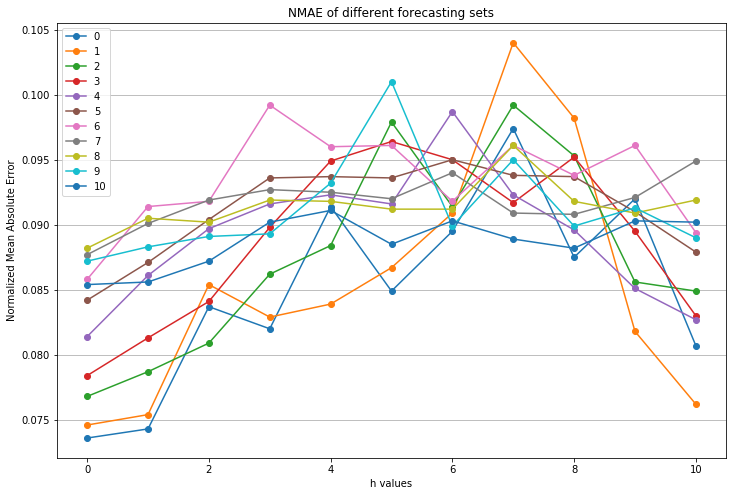

In [3]:
figure(figsize=(12, 8))
valuesH = np.arange(11)
for i in range(11):
    plt.plot(np.arange(11),testXXX[i], '-o', label = str(i))
plt.xlabel('h values')
plt.ylabel('Normalized Mean Absolute Error')
plt.legend()
plt.title('NMAE of different forecasting sets')
plt.grid()
plt.grid(axis='x')
plt.show()

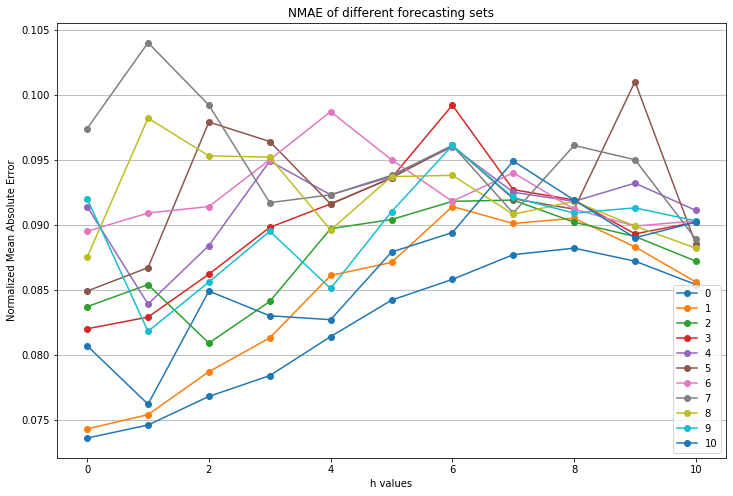

In [5]:
testYYY = np.array(testXXX).T
figure(figsize=(12, 8))
valuesH = np.arange(11)
for i in range(11):
    plt.plot(np.arange(11),testYYY[i], '-o', label = str(i))
plt.xlabel('h values')
plt.ylabel('Normalized Mean Absolute Error')
plt.legend()
plt.title('NMAE of different forecasting sets')
plt.grid()
plt.grid(axis='x')
plt.show()